In [75]:
%config IPCompleter.greedy=True

## Libraries

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import model_selection
from sklearn.model_selection import train_test_split

## Helper Functions

In [77]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

## Data Set Preparations

In [78]:
df = pd.read_csv("outputs\songs.csv")

df_X = df.iloc[:, 3:16]
df_y = df.liked

X = np.array(df.iloc[:, 3:16])
y = np.array(df.liked)

print(list(df_X.columns))
print(X.shape)
df

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
(2769, 13)


,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0,I Don't Wanna Love You Anymore,LANY,0.702,0.623,0,-8.360,1,0.0417,0.322000,0.000000,0.0858,0.503,104.974,201198,4,1
1,1937,Beautiful Disaster,Jon McLaughlin,0.432,0.664,7,-4.662,1,0.0302,0.215000,0.000000,0.1500,0.294,156.216,251640,4,1
2,1925,Gone Too Soon,Simple Plan,0.204,0.811,2,-4.326,1,0.0313,0.011900,0.000000,0.0908,0.296,87.903,195547,4,1
3,1930,Your Guardian Angel,The Red Jumpsuit Apparatus,0.290,0.480,5,-6.583,1,0.0296,0.116000,0.000003,0.6260,0.382,112.620,229235,4,1
4,1931,Fall For Anything,The Script,0.558,0.842,10,-4.381,0,0.0340,0.117000,0.000000,0.0672,0.491,123.048,272773,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,3110,Earned It,The Weeknd,0.659,0.291,2,-8.275,0,0.0348,0.405000,0.000000,0.0771,0.406,119.829,277680,3,0
2765,3111,Better Left Unsaid,Ariana Grande,0.585,0.831,9,-4.024,1,0.0334,0.039100,0.000144,0.1040,0.280,130.059,211227,4,0
2766,3112,All Around The World,Justin Bieber,0.689,0.816,3,-3.951,0,0.1780,0.018800,0.000002,0.1810,0.776,127.972,244547,4,0
2767,3113,Holiday,Green Day,0.290,0.827,8,-3.451,1,0.0362,0.000659,0.000003,0.3010,0.450,167.086,493400,4,0


## Data Explorations

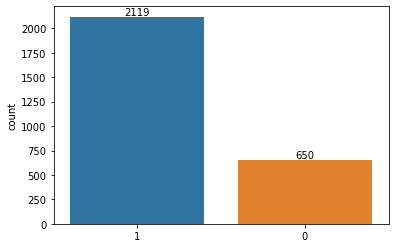

In [79]:
ax = sns.countplot(y, label="Sum", order=[1, 0])
values = df.liked.value_counts().values

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20, values[i], ha="center")
plt.show()

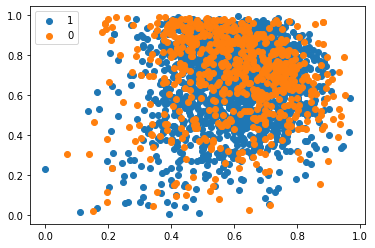

In [80]:
counter = Counter(y)
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Model Imports

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.svm import SVC

## Base Models

In [82]:
base_models = []
base_models.append(('CART', DecisionTreeClassifier()))
base_models.append(('NB', GaussianNB()))
base_models.append(('KNN', KNeighborsClassifier()))
base_models.append(('LDA', LinearDiscriminantAnalysis()))
base_models.append(('LogR', LogisticRegression()))
base_models.append(('LogRCV', LogisticRegressionCV()))
base_models.append(('SVM', SVC()))

In [83]:
seed = 10
k_splits = 13
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [84]:
base_X = X
base_y = y

In [85]:
base_results = []

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)

for name, model in base_models:
    cv_results = model_selection.cross_validate(model, base_X, base_y, cv=skfold, scoring=scoring)
    base_results.append(cv_results)

In [86]:

for (name, model), result in zip(base_models, base_results):
    print(f"{name} - {model}")
    for k, v in result.items():
        print(f"{k:20} \t {v.mean():>.4f}\t {v.std():>.4f} ")
    print()

CART - DecisionTreeClassifier()
fit_time             	 0.0287	 0.0021 
score_time           	 0.0045	 0.0018 
test_accuracy        	 0.6526	 0.0229 
test_precision_macro 	 0.5314	 0.0281 
test_recall_macro    	 0.5336	 0.0314 
test_f1_weighted     	 0.6578	 0.0212 
test_roc_auc         	 0.5358	 0.0325 

NB - GaussianNB()
fit_time             	 0.0012	 0.0004 
score_time           	 0.0037	 0.0007 
test_accuracy        	 0.7588	 0.0174 
test_precision_macro 	 0.6106	 0.0938 
test_recall_macro    	 0.5224	 0.0210 
test_f1_weighted     	 0.6884	 0.0193 
test_roc_auc         	 0.6225	 0.0480 

KNN - KNeighborsClassifier()
fit_time             	 0.0061	 0.0007 
score_time           	 0.0114	 0.0011 
test_accuracy        	 0.7277	 0.0263 
test_precision_macro 	 0.5458	 0.0689 
test_recall_macro    	 0.5213	 0.0314 
test_f1_weighted     	 0.6837	 0.0270 
test_roc_auc         	 0.5284	 0.0527 

LDA - LinearDiscriminantAnalysis()
fit_time             	 0.0050	 0.0010 
score_time           	 0.

## Feature Imports

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

## Feature Selection

In [88]:
df_columns = pd.DataFrame(df_X.columns)

In [89]:
best_features_f = SelectKBest(score_func=f_classif, k='all')
fit_f = best_features_f.fit(df_X, df_y)
df_scores_f = pd.DataFrame(fit_f.scores_)

feature_scores_f = pd.concat([df_columns, df_scores_f], axis=1)
feature_scores_f.columns = ['Features', 'Score (F)']
feature_scores_f.sort_values(['Score (F)'], inplace=True, ascending=False)

In [90]:
best_features_mi = SelectKBest(score_func=mutual_info_classif, k='all')
fit_mi = best_features_mi.fit(df_X, df_y)
df_scores_mi = pd.DataFrame(fit_mi.scores_)

feature_scores_mi = pd.concat([df_columns, df_scores_mi], axis=1)
feature_scores_mi.columns = ['Features', 'Score (MI)']
feature_scores_mi.sort_values(['Score (MI)'], inplace=True, ascending=False)

In [91]:
display_side_by_side([feature_scores_f, feature_scores_mi], ["F", "MI"])

,Features,Score (F)
5,speechiness,56.858382
11,duration_ms,43.178999
10,tempo,30.440568
8,liveness,14.882412
9,valence,11.134631
3,loudness,9.825199
6,acousticness,8.722136
0,danceability,1.750758
12,time_signature,1.016377
1,energy,0.809717


## New Models

In [97]:
new_models = []
new_results = []

X_train, X_test, y_train, y_test = train_test_split(df_X, y, random_state=seed, shuffle=True, stratify=y)

In [99]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

new_results.append(model_selection.cross_validate(clf, X_test, y_test, cv=skfold, scoring=scoring))
new_models.append(('LogR', clf))

for (name, model), result in zip(new_models, new_results):
    print(f"{name} - {model}")
    for k, v in result.items():
        print(f"{k:20} \t {v.mean():>.4f}\t {v.std():>.4f} ")
    print()


LogR - LogisticRegression()
fit_time             	 0.0106	 0.0024 
score_time           	 0.0074	 0.0012 
test_accuracy        	 0.7648	 0.0083 
test_precision_macro 	 0.3824	 0.0041 
test_recall_macro    	 0.5000	 0.0000 
test_f1_weighted     	 0.6629	 0.0112 
test_roc_auc         	 0.4061	 0.0980 

LogR - LogisticRegression()
fit_time             	 0.0118	 0.0028 
score_time           	 0.0071	 0.0008 
test_accuracy        	 0.7648	 0.0083 
test_precision_macro 	 0.3824	 0.0041 
test_recall_macro    	 0.5000	 0.0000 
test_f1_weighted     	 0.6629	 0.0112 
test_roc_auc         	 0.4061	 0.0980 

